# $Importing$ $Libraries$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import cross_val_score

# $Importing$ $Dataset$

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# $Data$ $Visualization$

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


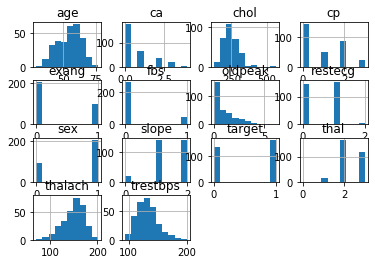

In [5]:
df.hist()
df.corr()


Text(0.5, 1.0, 'Count of each Target Class')

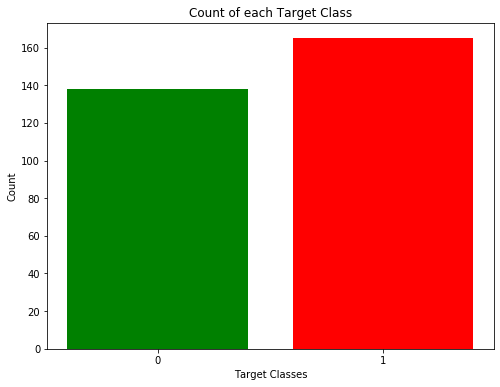

In [6]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

## Dummy Variable Trap

In [7]:
sex = pd.get_dummies(df['sex'],prefix='sex')
sex = sex.drop(['sex_0'],axis=1)

cp = pd.get_dummies(df['cp'],prefix='cp')
cp = cp.drop(['cp_3'],axis=1)

fbs = pd.get_dummies(df['fbs'],prefix='fbs')
fbs = fbs.drop(['fbs_0'],axis=1)

exang = pd.get_dummies(df['exang'],prefix='exang')
exang = exang.drop(['exang_0'],axis=1)

slope = pd.get_dummies(df['slope'],prefix='slope')
slope = slope.drop(['slope_0'],axis=1)

ca = pd.get_dummies(df['ca'],prefix='ca')
ca = ca.drop(['ca_4'],axis=1)

thal = pd.get_dummies(df['thal'],prefix='thal')
thal = thal.drop(['thal_0'],axis=1)

restecg = pd.get_dummies(df['restecg'],prefix='restecg')
restecg = restecg.drop(['restecg_2'],axis=1)

In [8]:
df = pd.concat([df,sex,fbs,exang,slope,ca,thal,cp,restecg],axis=1)
df = df.drop(['sex','fbs','exang','slope','ca','thal','cp','restecg'],axis=1)
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,fbs_1,exang_1,slope_1,...,ca_2,ca_3,thal_1,thal_2,thal_3,cp_0,cp_1,cp_2,restecg_0,restecg_1
0,63,145,233,150,2.3,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,37,130,250,187,3.5,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,57,120,354,163,0.6,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


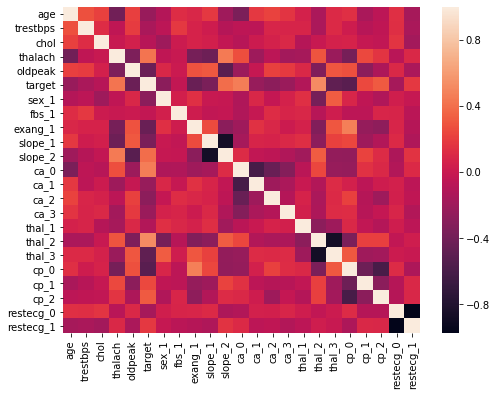

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
y=df['target']
X=df.drop('target',axis=1)

# $Data$  $Preprocessing$



## Standard Scaling

In [32]:

sc = StandardScaler()
X = sc.fit_transform(X)


## Splitting of Dataset

In [33]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
# Stores the accuracies obtained by employing various ML models
accuracies = {}

### Confusion Matrix

In [35]:
# Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report 
def confusion_matrix_compute(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred) 
    conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
    plt.figure(figsize = (8, 5)) 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
    plt.show() 
  
    print('The details for confusion matrix is =') 
    print (classification_report(y_test, y_pred))


### Logistic Regression

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
chances=(sum(y_pred)/y_pred.size)*100
acc = logreg.score(X_test,y_test)*100 
accuracies['Logistic Regression'] = acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Logistic Regression Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 57.38%
Logistic Regression Model Accuracy is 88.52%


CONFUSION MATRIX


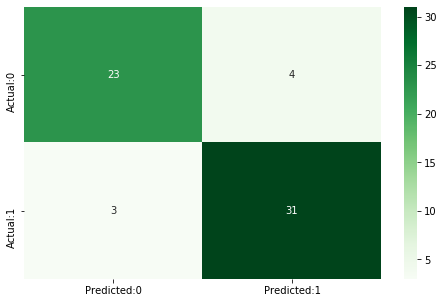

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [37]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

### KNN Classifer

TypeError: xticks() takes from 0 to 2 positional arguments but 3 were given

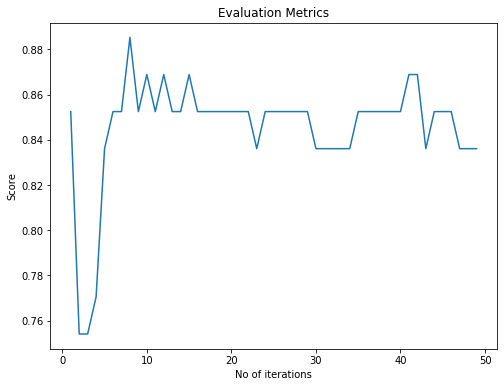

In [38]:
# KNN Classsifier
from sklearn.neighbors import KNeighborsClassifier
score_metrics=[]
chances=[]
iterations=50
for i in range(1,iterations):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    score_metrics.append(knn.score(X_test,y_test))

plt.plot(range(1,iterations),score_metrics)
plt.title("Evaluation Metrics")
plt.xlabel("No of iterations")
plt.ylabel("Score")
plt.xticks(1,iterations,1)
plt.show()



In [ ]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [39]:

acc=max(score_metrics)*100
max_index = np.argmax(score_metrics)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
accuracies['KNN']=acc
print("Max Model Accuracy is {:.2f}%".format(acc),"at iteration no. {:.2f}".format(max_index))
print("KNN Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 54.10%
Max Model Accuracy is 88.52% at iteration no. 7.00
KNN Model Accuracy is 88.52%


### SVM

In [40]:
# SVM Classifier using various kernels
kernels=["linear","rbf","poly","sigmoid"]
chances=[]
svc_scores=[]
for i in range (len(kernels)):
    clf=SVC(kernel=kernels[i])
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    svc_scores.append(clf.score(X_test,y_test))



CONFUSION MATRIX


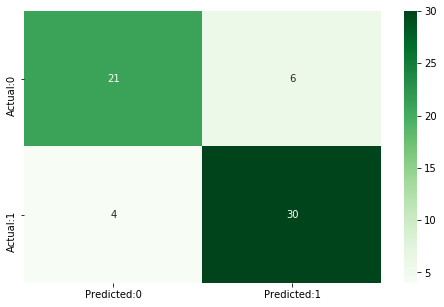

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [41]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

Heart Disease Risk Prediction : 54.10%
Max Model Accuracy obtained is 85.25% 
SVM Model Accuracy is 85.25% 


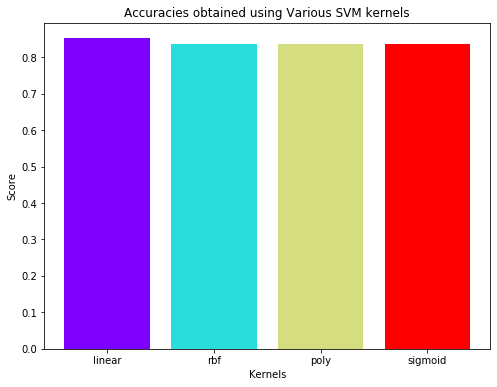

In [42]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels,svc_scores,color=colors)
plt.xlabel("Kernels")
plt.ylabel("Score")
plt.title("Accuracies obtained using Various SVM kernels")
acc=max(svc_scores)*100
max_index = np.argmax(svc_scores)
accuracies['SVM']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("Max Model Accuracy obtained is {:.2f}% ".format(acc))
print("SVM Model Accuracy is {:.2f}% ".format(acc))

## Naive Bayes

$P(c|x)$=$\dfrac{P(x|c)P(c)}{P(x)}$


$where,$$P(c|x)$=$P(x_1|c)\times P(x_2|c)\times P(x_3|c)\times P(x_4| c).......P(c)$

### Gaussian NB

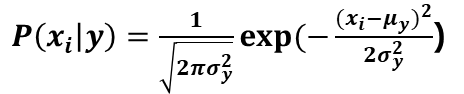

In [43]:
# Naive Bayes
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred=nb_classifier.predict(X_test)


CONFUSION MATRIX


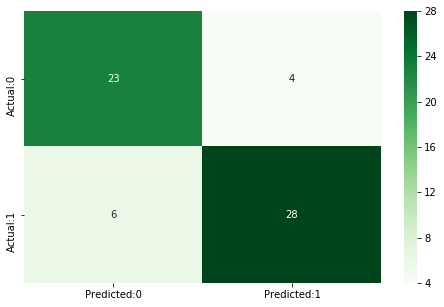

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [44]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

In [45]:
chances=(sum(y_pred)/y_pred.size)*100
acc=nb_classifier.score(X_test,y_test)*100
accuracies['Naive Bayes']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances))
print("Naive Bayes Model Accuracy is {:.2f}%".format(acc))

Heart Disease Risk Prediction : 52.46%
Naive Bayes Model Accuracy is 83.61%


In [46]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_scores=[]
chances=[]
for i in range(1,len(X[0])+1):
    dt_clf=DecisionTreeClassifier(max_features=i,criterion='entropy', random_state=0)
    dt_clf.fit(X_train,y_train)
    y_pred=dt_clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    dt_scores.append(dt_clf.score(X_test,y_test))


CONFUSION MATRIX


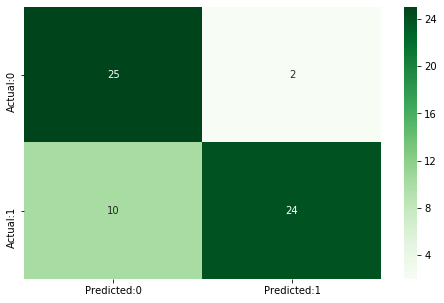

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.92      0.71      0.80        34

    accuracy                           0.80        61
   macro avg       0.82      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61



In [47]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

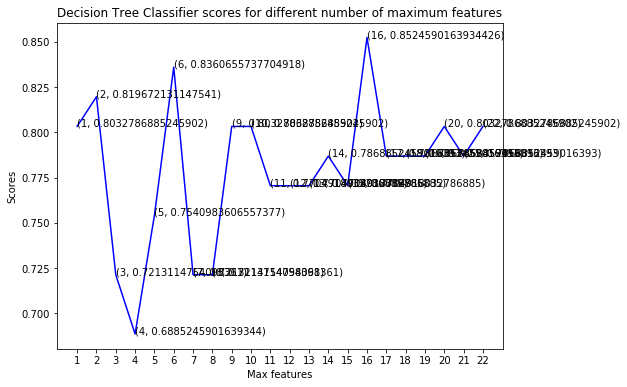

In [48]:
plt.plot([i for i in range(1, len(X[0]) + 1)], dt_scores, color = 'blue')
for i in range(1, len(X[0]) + 1):

    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X[0]) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [49]:
acc=max(dt_scores)*100
max_index = np.argmax(dt_scores)
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("Decision Tree Classifier Model Accuracy is {:.2f}% at maximum feature={:.0f}".format(acc,max_index))
accuracies['Decision Tree']=acc

Heart Disease Risk Prediction : 50.82%
Decision Tree Classifier Model Accuracy is 85.25% at maximum feature=15


In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_scores=[]
estimators = [10, 100, 200, 500, 1000]
chances=[]
for i in estimators:
    rf_clf=RandomForestClassifier(n_estimators=i,criterion='entropy', random_state=0)
    rf_clf.fit(X_train,y_train)
    y_pred=rf_clf.predict(X_test)
    chances.append((sum(y_pred)/y_pred.size)*100)
    rf_scores.append(dt_clf.score(X_test,y_test))

CONFUSION MATRIX


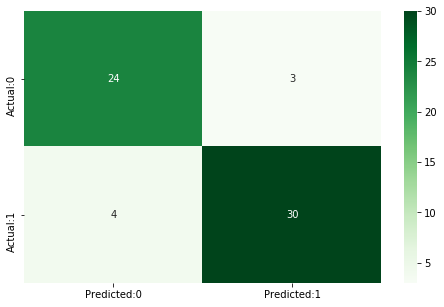

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [51]:
print("CONFUSION MATRIX")
confusion_matrix_compute(y_test,y_pred)

Heart Disease Risk Prediction : 47.54%
Random Forest Classification Model Accuracy is 80.33% at no. of estimators=10


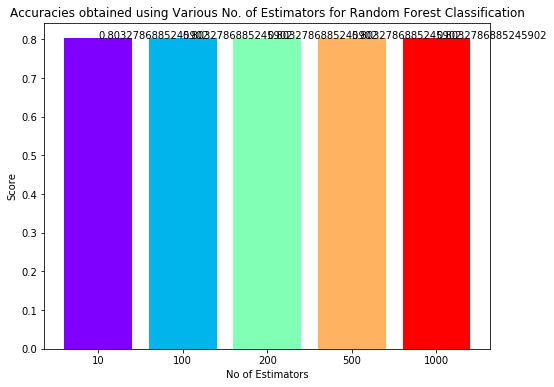

In [52]:
colors = rainbow(np.linspace(0, 1, len(estimators)))

plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
plt.xlabel("No of Estimators")
plt.ylabel("Score")

for i in range(len(estimators)):

    plt.text(i, rf_scores[i],rf_scores[i])
    
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.title("Accuracies obtained using Various No. of Estimators for Random Forest Classification")
acc=max(rf_scores)*100
max_index = np.argmax(rf_scores)
accuracies['Random Forest']=acc
print("Heart Disease Risk Prediction : {:.2f}%".format(chances[max_index]))
print("Random Forest Classification Model Accuracy is {:.2f}% at no. of estimators={:.0f}".format(acc,estimators[max_index]))

## k fold Cross Validation score

In [53]:
print("k fold Cross Val Score")
print("logistic={:.2f}%".format(np.mean(cross_val_score(logreg,X,y,cv=10))*100))
knn=KNeighborsClassifier(n_neighbors=7)
print("KNN ={:.2f}%".format(np.mean(cross_val_score(knn,X,y,cv=10))*100))
nb_classifier=GaussianNB()
print("Gaussian Naive Bayes={:.2f}%".format(np.mean(cross_val_score(nb_classifier,X,y,cv=10))*100))
clf=SVC(kernel="rbf")
print("SVC={:.2f}%".format(np.mean(cross_val_score(clf,X,y,cv=10))*100))
dt_clf=DecisionTreeClassifier(max_features=15,criterion='entropy', random_state=0)
print("Decision tree classifier={:.2f}%".format(np.mean(cross_val_score(dt_clf,X,y,cv=10))*100))
rf_clf=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
print("Random Forest Classifier={:.2f}%".format(np.mean(cross_val_score(rf_clf,X,y,cv=10))*100))

k fold Cross Val Score
logistic=85.69%
KNN =84.08%
Gaussian Naive Bayes=83.75%
SVC=84.39%
Decision tree classifier=73.81%
Random Forest Classifier=82.03%


## Comparison of Accuracies of ML Models

<BarContainer object of 6 artists>

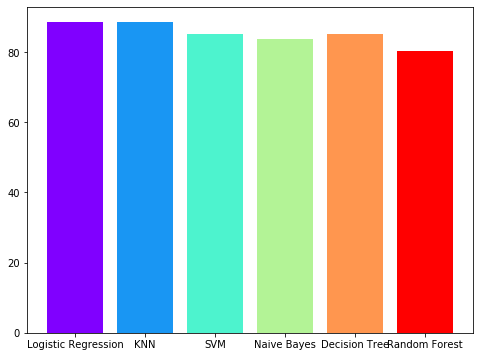

In [54]:
model=accuracies.keys()
score=accuracies.values()
colors = rainbow(np.linspace(0, 1, len(model)))
plt.bar(model,score,color=colors,width=0.8)
